In [1]:
import pandas as pd
import numpy as np

sampled_df = pd.read_csv("sampled_df.csv").drop(columns = ["Unnamed: 0"])

sampled_df.drop(columns = ['Food code', 'Main food description',
       'WWEIA Category number', 'WWEIA Category description'], inplace = True)
sampled_df_trimmed = sampled_df[['Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)',
       'Sugars, total\n(g)', 'Fiber, total dietary (g)', 'Total Fat (g)','label_foods']]

from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(sampled_df_trimmed, test_size=0.3)
TrainDF2, TestDF2 = train_test_split(sampled_df_trimmed, test_size=0.3)
TrainDF3, TestDF3 = train_test_split(sampled_df_trimmed, test_size=0.3)
TrainDF4, TestDF4 = train_test_split(sampled_df_trimmed, test_size=0.4)

###############################################
## For all FOUR DFs - separate label_foodsS
#################################################
## IMPORTANT - YOU CANNOT LEAVE label_foodsS ON THE TEST SET
## Save label_foodss
### TEST ---------------------
Test1Labels=TestDF1["label_foods"]

Test2Labels=TestDF2["label_foods"]
Test3Labels=TestDF3["label_foods"]
Test4Labels=TestDF4["label_foods"]

## remove label_foodss
TestDF1 = TestDF1.drop(["label_foods"], axis=1)
TestDF2 = TestDF2.drop(["label_foods"], axis=1)
TestDF3 = TestDF3.drop(["label_foods"], axis=1)
TestDF4 = TestDF4.drop(["label_foods"], axis=1)


## TRAIN ----------------------------
Train1Labels=TrainDF1["label_foods"]
Train2Labels=TrainDF2["label_foods"]
Train3Labels=TrainDF3["label_foods"]
Train4Labels=TrainDF4["label_foods"]

## remove label_foodss
TrainDF1 = TrainDF1.drop(["label_foods"], axis=1)
TrainDF2 = TrainDF2.drop(["label_foods"], axis=1)
TrainDF3 = TrainDF3.drop(["label_foods"], axis=1)
TrainDF4 = TrainDF4.drop(["label_foods"], axis=1)

In [2]:
#########################################################
#############    Decision Trees   #######################
#########################################################

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=10, 
                            min_samples_split=3, 
                            min_samples_leaf=2, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,                             
                            class_weight=None)


## ------------------------------
## This for loop will fit and predict Decision Trees for 
## all 4 of the dataframes. Notice that this uses dynamic variables
## and eval
##--------------------------
##
print(TrainDF1)

     Energy (kcal)  Protein (g)  Carbohydrate (g)  Sugars, total\n(g)  \
36             111        12.46              8.74                0.50   
138            123        10.13             11.91                0.96   
167            314        18.03             12.64                0.11   
46             106         4.13             15.09                1.23   
124             94         2.30             19.51                1.60   
..             ...          ...               ...                 ...   
73             206        25.72              0.00                0.00   
148             98         4.99             13.81                4.26   
117            116         5.56             16.23                5.08   
32             482         7.50             57.14               10.00   
205             44         0.75              8.84                7.52   

     Fiber, total dietary (g)  Total Fat (g)  
36                        0.4           2.60  
138                       0.8

In [9]:
from sklearn.metrics import classification_report
import plotly.express as px

In [11]:
labels = ['Fruits and Vegetables', 'Meat', 'Dairy']

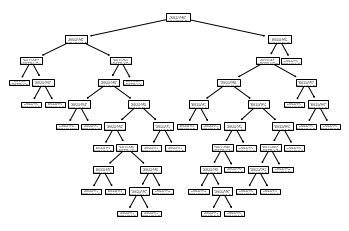

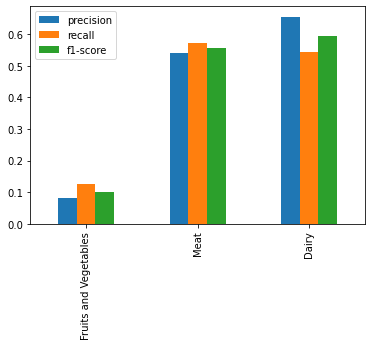

1. feature 1 (0.489143)
feature name:  Protein (g)
2. feature 4 (0.328174)
feature name:  Fiber, total dietary (g)
3. feature 3 (0.072066)
feature name:  Sugars, total
(g)
4. feature 0 (0.065891)
feature name:  Energy (kcal)
5. feature 5 (0.035026)
feature name:  Total Fat (g)
6. feature 2 (0.009701)
feature name:  Carbohydrate (g)


<AxesSubplot:>

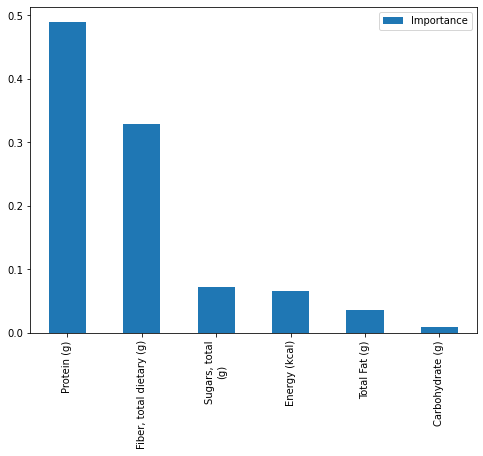

In [14]:
i = 1
temp1=str("TrainDF"+str(i))   ##  TrainDF1
temp2=str("Train"+str(i)+"Labels")  #Train1Labels
temp3=str("TestDF"+str(i))  #TestDF1
temp4=str("Test"+str(i)+"Labels") # Test1Labels

## perform DT
#MyDT.fit(TrainDF1, Train1Labels)
MyDT.fit(eval(temp1), eval(temp2))
## plot the tree
tree.plot_tree(MyDT)
plt.savefig(temp1)
feature_names=eval(str(temp1+".columns"))
dot_data = tree.export_graphviz(MyDT, out_file=None,
                ## The following creates TrainDF.columns for each
                ## which are the feature names.
                  feature_names=eval(str(temp1+".columns")),  
                  #class_names=MyDT.class_names,  
                  filled=True, rounded=True,  
                  special_characters=True)                                    
graph = graphviz.Source(dot_data) 
## Create dynamic graph name
tempname=str("Graph" + str(i))
graph.render(tempname) 
## Show the predictions from the DT on the test set
DT_pred=MyDT.predict(eval(temp3))
## Show the confusion matrix
bn_matrix = confusion_matrix(eval(temp4), DT_pred)
classification_report_dt = classification_report(eval(temp4), DT_pred, target_names=labels, digits=4, output_dict=True)
fig = px.imshow(bn_matrix, 
                labels=dict(x="Actuals", y="Predicted", color="Items Classified"),
                x=labels,
                y=labels,text_auto=True)
fig.show()
df = pd.DataFrame(classification_report_dt)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()
fig2 = px.imshow(np.round(df.iloc[:3, :3].T,2),text_auto=True)
fig2.show()
FeatureImp=MyDT.feature_importances_   
indices = np.argsort(FeatureImp)[::-1]
## print out the important features.....
for f in range(TrainDF4.shape[1]):
    if FeatureImp[indices[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], FeatureImp[indices[f]]))
        print ("feature name: ", feature_names[indices[f]])
        

feat_importances = pd.DataFrame(MyDT.feature_importances_, index=TrainDF1.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))        